In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/bhumi/Downloads/londor smart meter.csv")
data

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,15-12-2011,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,16-12-2011,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,17-12-2011,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,18-12-2011,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,19-12-2011,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
...,...,...,...,...,...,...,...,...,...
21633,MAC004629,31-10-2012,0.0820,0.194292,0.661,48,0.199910,9.326,0.022
21634,MAC004629,01-11-2012,0.1450,0.229104,0.924,48,0.225691,10.997,0.024
21635,MAC004629,02-11-2012,0.1620,0.249104,0.830,48,0.237681,11.957,0.022
21636,MAC004629,03-11-2012,0.0760,0.198687,0.733,48,0.210109,9.537,0.009


In [3]:
print(data.isnull().sum())

LCLid             0
day               0
energy_median     0
energy_mean       0
energy_max        0
energy_count      0
energy_std       41
energy_sum        0
energy_min        0
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['energy_std'] = imputer.fit_transform(data[['energy_std']])

In [5]:
print(data.isnull().sum())

LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64


In [6]:
data['day'] = pd.to_datetime(data['day'], format='%d-%m-%Y')

In [7]:
data['day_of_week'] = data['day'].dt.dayofweek  
data['month'] = data['day'].dt.month
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [8]:
data = data.drop(['LCLid', 'day'], axis=1)

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)


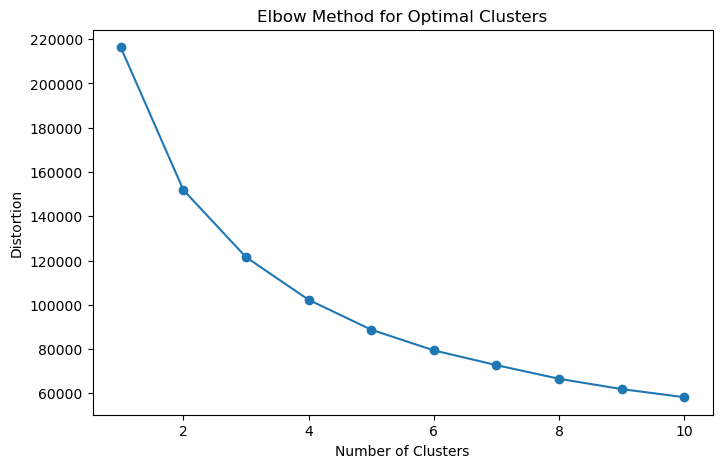

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [16]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data.columns[:-1])
print(cluster_centers)

   energy_median  energy_mean  energy_max  energy_count  energy_std  \
0       0.126905     0.184367    0.789161     47.853159    0.163682   
1       0.511488     0.700096    2.433005     47.800210    0.564312   
2       0.144753     0.193329    0.804085     47.958854    0.162462   

   energy_sum  energy_min  day_of_week     month    is_weekend  
0     8.82875    0.051717     1.999475  6.403418  6.550316e-15  
1    33.40952    0.201356     2.922187  5.914826  2.537680e-01  
2     9.26672    0.055455     5.496877  6.489530  1.000000e+00  


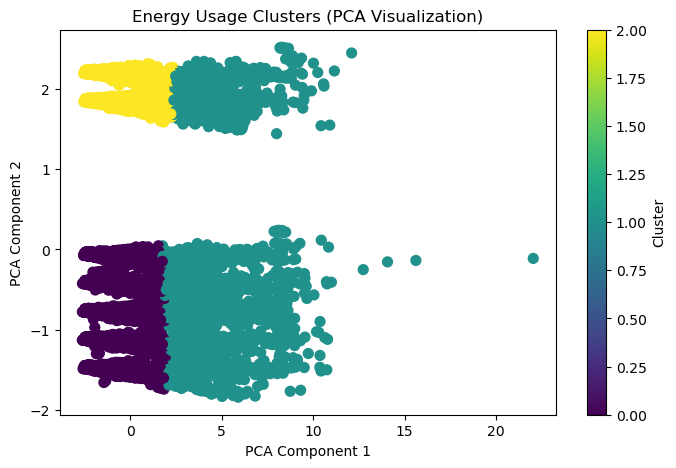

In [17]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title("Energy Usage Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()



In [19]:
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    print("Cluster {cluster} Statistics:")
    print(cluster_data.describe())

Cluster {cluster} Statistics:
       energy_median   energy_mean    energy_max  energy_count    energy_std  \
count   13340.000000  13340.000000  13340.000000  13340.000000  13340.000000   
mean        0.126890      0.184347      0.789075     47.853148      0.163661   
std         0.076062      0.102794      0.601957      2.368695      0.124424   
min         0.000000      0.000000      0.000000      1.000000      0.000000   
25%         0.060375      0.099323      0.318000     48.000000      0.064430   
50%         0.119500      0.182333      0.709000     48.000000      0.140654   
75%         0.174000      0.256083      1.101000     48.000000      0.239299   
max         0.627500      0.495812      4.308000     48.000000      0.744875   

         energy_sum    energy_min   day_of_week         month  is_weekend  \
count  13340.000000  13340.000000  13340.000000  13340.000000     13340.0   
mean       8.827794      0.051717      1.999625      6.403823         0.0   
std        4.93945